# Proyecto Integrador 1 - Análisis estadístico de datos

## Descripción
Este proyecto está basado en el supuesto de trabajar para una tienda online llamada "Ice" que vende videojuegos por todo el mundo. Trabajaremos con un dataset con el objetivo de identificar patrones que determinen si un juego tiene éxito o no.

### Estrategia
El proyecto lo dividiremos en las siguientes etapas:
1. Exploración del dataset
2. Preprocesamiento de los datos
3. Análisis de los datos
4. Segmentación de datos
5. Pruebas de hipótesis
6. Conclusión general



## 1. Exploración del dataset
En esta sección cargaremos el dataset al proyecto y estudiaremos la estructura general de los datos para familiarizarnos con los mismos.

In [2]:
# Cargamos las librerías
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Utilizamos un bloque try-except para incluir las dos rutas al archivo (ruta relativa en PC local y ruta relativa en el servidor de TripleTen)
try:
  games = pd.read_csv('./datasets/games.csv')
  platform_info = pd.read_csv('./datasets/consolas.csv', sep='|')
except:
  games = pd.read_csv('/datasets/games.csv')
  platform_info = pd.read_csv('/datasets/consolas.csv', sep='|')

In [4]:
# Mostramos la estructura del dataset con el método info(), describe() y visualizamos las primeras líneas con head().
games.info()
print()
print(games.describe()) # Mostramos los datos de las columnas numéricas
print()
print(games.describe(include='object')) # Exploramos el método describe en los campos con tipo de dato object

# Mostramos las primeras líneas del dataframe
games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Mostramos el dataset 'platform_info'
platform_info.info()
platform_info.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   platform           31 non-null     object
 1    commercial_name   31 non-null     object
 2    vendor            31 non-null     object
 3    year_of_release   31 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


,platform,commercial_name,vendor,year_of_release
0,PS2,PlayStation 2,Sony,2000
1,DS,Nintendo DS,Nintendo,2004
2,PS3,PlayStation 3,Sony,2006
3,Wii,Wii,Nintendo,2006
4,X360,Xbox 360,Microsoft,2005


### Observaciones
1. Dataframe 'games':
- En un primer vistazo observamos que tenemos 16715 filas y 11 columnas.
- Tenemos varias columnas con datos ausentes, en algunas columnas son muchos los datos ausentes.
- Tenemos también tipos de datos que no corresponden a lo que el nombre de la columna indica.
2. Dataframe 'platform_info':
- Observamos que tenemos espacios en blanco para eliminar tanto en los nombres de columnas, como la info del dataset.

## 2. Preprocesamiento de los datos
En esta sección nos enfocaremos en buscar y corregir errores de presentación, valores duplicados y valores ausentes.

### 2.1 Errores de presentación
En la sección anterior identificamos rápidamente que los nombres de las columnas no siguen el formato preferido "snake_case". Vamos a corregirlos.
También identificamos algunos tipos de datos que podemos cambiar, otros necesitarán un tratamiento previo para poder cambiarlos, ese tratamiento lo haremos en las siguientes secciones al revisar valores ausentes y duplicados.

In [6]:
# Cambiar nombres de columnas al formato "snake_case"
new_col_names = []
for name in games.columns:
    name_lowered = name.lower()
    new_col_names.append(name_lowered)

games.columns = new_col_names
games.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# Cambiamos el tipo de datos de 'year_of_release' a tipo de fecha
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y')
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [8]:
# Eliminamos los espacios en blanco del dataset 'platform_info'
# Primero eliminamos los epacios en las columnas
new_col_names = []
for name in platform_info.columns:
    name_striped = name.strip()
    new_col_names.append(name_striped)
platform_info.columns = new_col_names

# Después eliminamos los espacios en el contenido del dataset

for column in platform_info:
    if platform_info[column].dtype == object:
        platform_info[column] = platform_info[column].str.strip()

# Cambiamos el tipo de datos de 'year_of_release'
platform_info['year_of_release'] = pd.to_datetime(platform_info['year_of_release'], format='%Y')

platform_info.info()
platform_info.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   platform         31 non-null     object        
 1   commercial_name  31 non-null     object        
 2   vendor           31 non-null     object        
 3   year_of_release  30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 1.1+ KB


,platform,commercial_name,vendor,year_of_release
0,PS2,PlayStation 2,Sony,2000-01-01
1,DS,Nintendo DS,Nintendo,2004-01-01
2,PS3,PlayStation 3,Sony,2006-01-01
3,Wii,Wii,Nintendo,2006-01-01
4,X360,Xbox 360,Microsoft,2005-01-01


### 2.2 Valores duplicados
En esta sección analizaremos si tenemos filas completas duplicadas y duplicados implícitos en las columnas 'platform' y 'genre'

In [9]:
# Buscamos filas completas duplicadas
print('Filas completas duplicadas:', games.duplicated().sum())

Filas completas duplicadas: 0


In [10]:
# Buscamos duplicados implícitos en las columnas 'platform' y 'genre'
print(games['platform'].value_counts())
print()
print(games['genre'].value_counts())

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64


### 2.3 Valores ausentes
En esta sección analizaremos los valores ausentes y determinaremos cómo manejarlos

In [11]:
print('Resumen de valores ausentes por columna') # Imprimimos un encabezado explicativo para nuestra tabla
print() # Imprimimos un salto de línea
print(games.isna().sum()) # Calcular el número de valores ausentes

Resumen de valores ausentes por columna

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [12]:
# Analizamos los valores ausentes en la columna 'name'
print(games[games['name'].isna()])
# Eliminamos estas filas ya que no podemos hacer un buen análisis sin esta información. 
# Además la plataforma es muy antigua por lo que considero que no es información tan relevante para nuestro análisis.
games = games.dropna(subset=['name'])

      name platform year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN      1993-01-01   NaN      1.78      0.53      0.00   
14244  NaN      GEN      1993-01-01   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [13]:
# Analizamos los valores ausentes en la columna 'year_of_release'
missing_year_of_release = games[games['year_of_release'].isna()]   # Filtramos las filas con valores ausentes
missing_year_of_release.describe()                                 # Utilizamos el método describe para ver los valores máximos, mínimos y media de ventas


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0,269.000000,269.000000,269.000000,269.000000,154.000000
mean,NaT,0.219888,0.090929,0.024907,0.032007,67.584416
min,NaT,0.000000,0.000000,0.000000,0.000000,22.000000
25%,NaT,0.010000,0.000000,0.000000,0.000000,57.000000
50%,NaT,0.090000,0.020000,0.000000,0.010000,70.000000
75%,NaT,0.240000,0.100000,0.000000,0.030000,78.000000
max,NaT,4.260000,2.360000,0.770000,0.710000,94.000000
std,NaN,0.424907,0.207933,0.090160,0.075546,14.828740


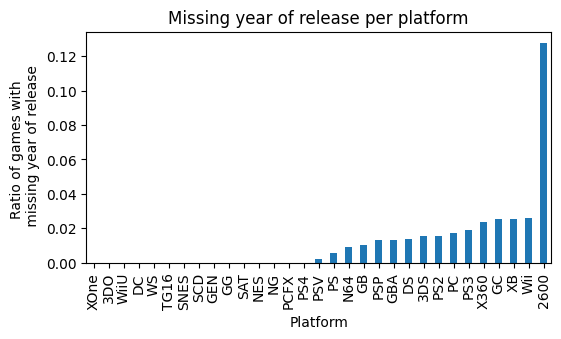

In [14]:
# Analizamos los valores ausentes respecto a las plataformas
plt.figure(figsize=(6,3))
games['year_of_release'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')
plt.title('Missing year of release per platform')
plt.xlabel('Platform')
plt.ylabel('Ratio of games with \n missing year of release')
plt.show()


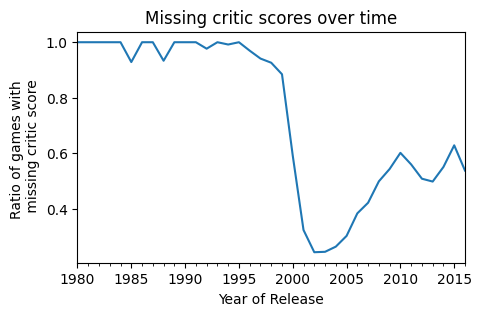

In [15]:
# Analizamos los valores ausentes en la columna 'critic_score'
# Analizamos valores ausentes respecto al tiempo
plt.figure(figsize=(5,3))
games['critic_score'].isna().groupby(games['year_of_release']).mean().plot(kind='line')
plt.title('Missing critic scores over time')
plt.xlabel('Year of Release')
plt.ylabel('Ratio of games with \n missing critic score')
plt.show()


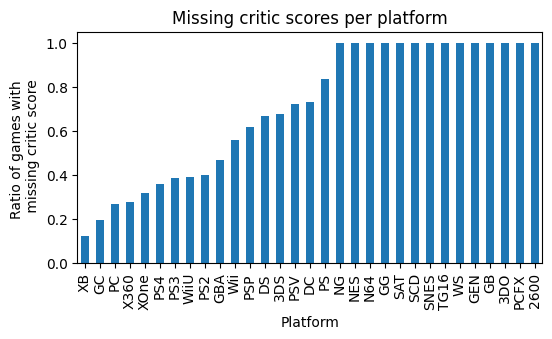

In [16]:
# Analizamos los valores ausentes respecto a las plataformas
plt.figure(figsize=(6,3))
games['critic_score'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')
plt.title('Missing critic scores per platform')
plt.xlabel('Platform')
plt.ylabel('Ratio of games with \n missing critic score')
plt.show()


Valores ausentes en la columna 'user_score': 6699
Valores marcados como "tbd" en la columna "user_score": 2424


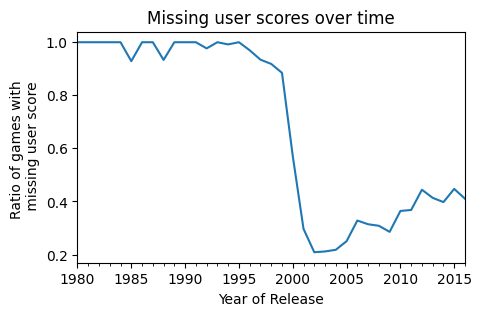

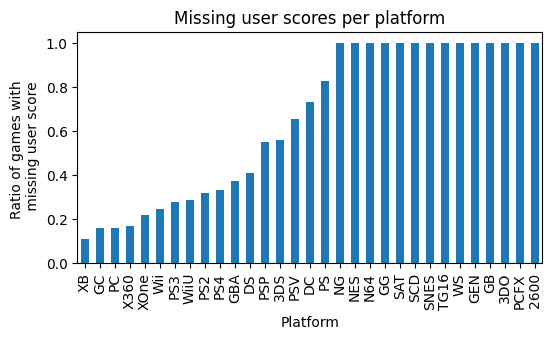

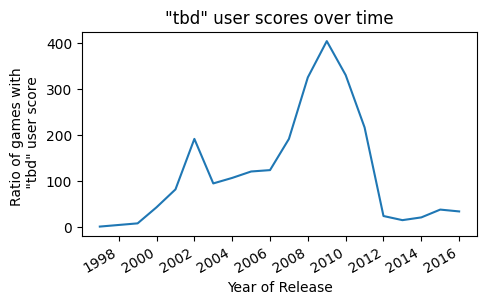

In [17]:
# Analizamos los valores ausentes en la columna 'user_score'
print("Valores ausentes en la columna 'user_score':", games['user_score'].isna().sum())
print('Valores marcados como "tbd" en la columna "user_score": 2424') # Este dato lo obtuvimos con el método describe en la sección 1 Exploración del dataset

# Analizamos valores ausentes respecto al tiempo
plt.figure(figsize=(5,3))
games['user_score'].isna().groupby(games['year_of_release']).mean().plot(kind='line')
plt.title('Missing user scores over time')
plt.xlabel('Year of Release')
plt.ylabel('Ratio of games with \n missing user score')
plt.show()

# Analizamos los valores ausentes respecto a las plataformas
plt.figure(figsize=(6,3))
games['user_score'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')
plt.title('Missing user scores per platform')
plt.xlabel('Platform')
plt.ylabel('Ratio of games with \n missing user score')
plt.show()

#Analizamos los valores marcados como "tbd" con respecto al tiempo
tbd_user_score = games[(games['user_score']=='tbd')] # filtramos la tabla para tener solo los que tienen "tbd" y poder graficar
plt.figure(figsize=(5.1,3))
tbd_user_score.groupby('year_of_release')['user_score'].count().plot(kind='line')
plt.title('"tbd" user scores over time')
plt.xlabel('Year of Release')
plt.ylabel('Ratio of games with \n "tbd" user score')
plt.show()


In [18]:
# Analizamos los valores marcados como "tbd" con respecto a las ventas
tbd_user_score.describe(exclude=['datetime64[ns]'])


,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
count,2424,2424,2424,2424.000000,2424.000000,2424.000000,2424.000000,1082.000000,2424,2374
unique,1941,16,12,NaN,NaN,NaN,NaN,NaN,1,5
top,Rapala Pro Bass Fishing 2010,DS,Misc,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,5,756,449,NaN,NaN,NaN,NaN,NaN,2424,1575
mean,NaN,NaN,NaN,0.126052,0.043519,0.002727,0.015862,60.711645,NaN,NaN
std,NaN,NaN,NaN,0.180586,0.111412,0.026136,0.039156,11.193035,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,23.000000,NaN,NaN
25%,NaN,NaN,NaN,0.030000,0.000000,0.000000,0.000000,54.000000,NaN,NaN
50%,NaN,NaN,NaN,0.075000,0.010000,0.000000,0.010000,62.000000,NaN,NaN
75%,NaN,NaN,NaN,0.150000,0.040000,0.000000,0.020000,69.000000,NaN,NaN


In [19]:
# Analizamos los juegos que podríamos considerar populares por tener ventas superiores a 1M en alguna región
pop_games_tbd_user_score = tbd_user_score.query("na_sales >= 1 or eu_sales >=1 or jp_sales >= 1 or other_sales >=1")
pop_games_tbd_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010-01-01,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005-01-01,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011-01-01,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010-01-01,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaT,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010-01-01,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009-01-01,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004-01-01,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999-01-01,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001-01-01,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


In [20]:
# Filtramos el dataset 'games' con los resultados de la búsqueda anterior, para ver si estos juegos se 
# encuentran en otras plataformas y en esas plataformas sí cuentan con user_score.
filtered = games.query("name in @pop_games_tbd_user_score.name").sort_values(by='name')

# agrupamos por 'name' y 'platform' y mostramos la columna 'user_score' para ver si en otras plataformas sí tienen
# calificación en 'user_score'
tbd_in_other_platforms = filtered.groupby(['name','platform'])['user_score'].sum().reset_index(name='user_score')
tbd_in_other_platforms.query("user_score !=0")



,name,platform,user_score
0,Dance Dance Revolution X2,PS2,tbd
1,Disney Princess,GBA,tbd
2,Disney Princess: Magical Jewels,DS,tbd
4,Disney Sing It: Pop Hits,PS3,tbd
5,Disney Sing It: Pop Hits,Wii,tbd
6,Frogger's Adventures: Temple of the Frog,GBA,tbd
7,Game Party 3,Wii,tbd
8,Just Dance Kids,Wii,tbd
9,Namco Museum: 50th Anniversary,GBA,tbd
10,Namco Museum: 50th Anniversary,GC,tbd


In [21]:
# Sustituimos los "tbd" por un valor ausente tipo NaN y los agregamos a una nueva columna para poder utilizarlos en análisis númericos posteriores
games['fixed_user_score'] = games['user_score'].where(games['user_score'] != 'tbd', float('nan'))
# cambiamos el tipo de datos a float
games['fixed_user_score'] = games['fixed_user_score'].astype('float')
games['fixed_user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

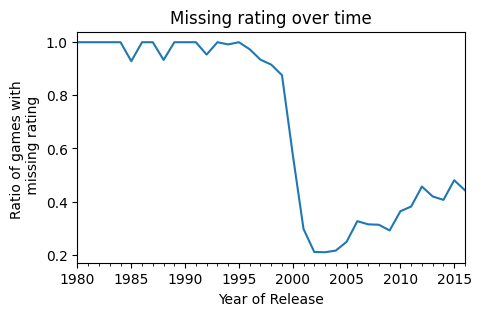

In [22]:
# Analizamos los valores ausentes para la columna 'rating'
# Analizamos valores ausentes respecto al tiempo
plt.figure(figsize=(5,3))
games['rating'].isna().groupby(games['year_of_release']).mean().plot(kind='line')
plt.title('Missing rating over time')
plt.xlabel('Year of Release')
plt.ylabel('Ratio of games with \n missing rating')
plt.show()

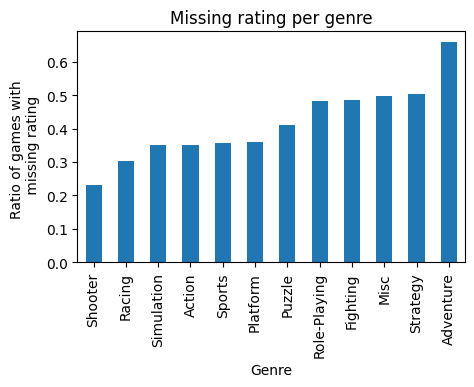

In [23]:
# Analizamos los valores ausentes respecto al género
plt.figure(figsize=(5,3))
games['rating'].isna().groupby(games['genre']).mean().sort_values().plot(kind='bar')
plt.title('Missing rating per genre')
plt.xlabel('Genre')
plt.ylabel('Ratio of games with \n missing rating')
plt.show()

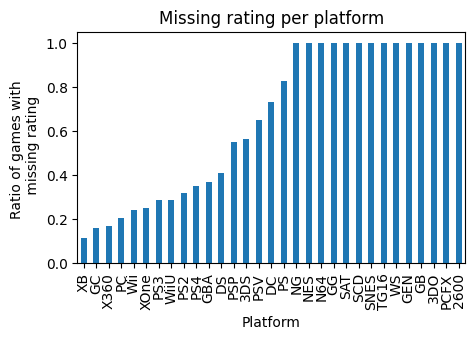

In [24]:
# Analizamos los valores ausentes respecto a la plataforma
plt.figure(figsize=(5,3))
games['rating'].isna().groupby(games['platform']).mean().sort_values().plot(kind='bar')
plt.title('Missing rating per platform')
plt.xlabel('Platform')
plt.ylabel('Ratio of games with \n missing rating')
plt.show()

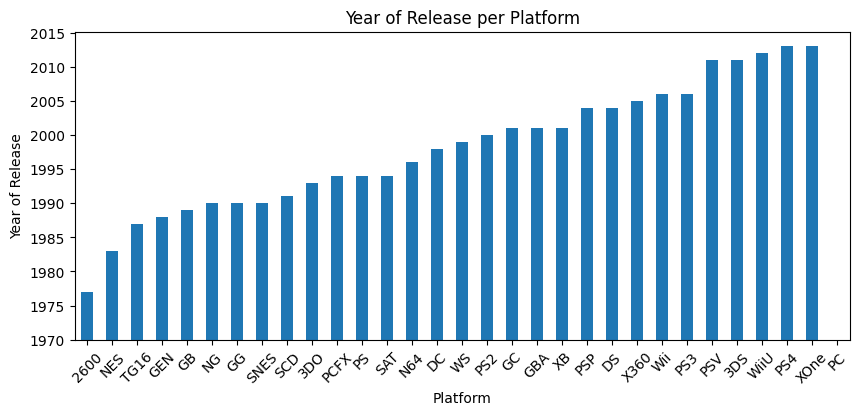

In [25]:
# Mostramos la información de la tabla 'platform_info' para ver los años de lanzamiento de las distintas plataformas de videojuegos
platform_info.sort_values(by='year_of_release').plot(
    kind='bar',
    x='platform',
    y='year_of_release',
    xlabel='Platform',
    ylabel='Year of Release',
    legend=False,
    rot=45,
    title='Year of Release per Platform',
    figsize=[10, 4]
)
plt.show()

In [26]:
# Calculamos las ventas totales de todas las regiones para cada juego
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games[['name', 'total_sales']].head()

,name,total_sales
0,Wii Sports,82.54
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.38


#### Observaciones
En esta sección nos enfocamos en analizar y en su caso corregir algunos errores de presentación, valores duplicados y valores ausentes. Encontrando lo siguiente:
1. Errores de presentación:
   1. Los nombres de las columnas no estaban en el formato preferido "snake_case" por lo que fueron cambiados a este formato.
   2. Se cambiaron los tipos de datos de la columna 'year_of_release' al tipo datetime, ya que corresponden al año de una fecha.
2. Valores duplicados:
   1. Se buscaron duplicados explícitos, es decir, filas completas duplicadas, pero no se encontró ninguna.
   2. Exploramos las columnas 'platform' y 'genre' sin encontrar detalles a corregir.
   3. Explorar la columma 'name' en búsqueda de duplicados implícitos es un trabajo manual que no se abordará en este proyecto. Sin embargo, al realizar algunas búsquedas puntuales sobre nombres de juegos en internet, se detectó que algunos nombres son ligeramente diferentes a los oficiales.
3. Valores ausentes:
   1. Con respecto a los valores ausentes de la columna 'name' se eliminaron dos filas completas considerando que las ventas no son significativas para el objetivo de nuestro análisis y la plataforma a la que pertenecen estos juegos también es muy antigua. Estas mismas filas tenían valores ausentes en la columna 'genre'.
   2. En la columna 'year_of_release' tenemos 269 valores ausentes. 
      1. Separamos estas filas para ver el impacto en la información de ventas si decidieramos eliminar las filas. Aunque pareciera no ser un impacto significativo viendo la media y la desviación estándar, tenemos algunos máximos que vale la pena conservar.
      2. Se analizaron también por plataforma para ver si había algún patrón, sin embargo vemos que tenemos valores ausentes tanto en plataformas más recientes como en las más antíguas.
      3. Por lo anterior, podríamos pensar que la falta de estos datos es solamente una falla en la captura de datos, ya que todos los juegos deben de tener una fecha de lanzamiento.
   3. En las columnas 'critic score', 'user_score' y 'rating', vemos una distribución de valores ausentes comparados en el tiempo muy similar. 
      1. En el caso de 'rating' sabemos que la ESRB se estableción en 1994, por lo que es de esperarse no tener esta clasificación en juegos anteriores a esa fecha. En la gráfica del tiempo podemos ver que tuvo una adopción lenta de 1994 a 1999 y después se aceleró hasta el 2002, la tendencia se mantiene hasta aproximadamente el 2005. Si bien la clasificación por la ESRB no es obligatoria, hay reportes de que en 2005 se incrementaron las multas por la falta de esta clasificación. 
      Se analizaron también con respecto a los géneros, y si bien vemos que sobresale un poco el género "Adventure", no hay una tendencia clara que indique más clasificaciones faltantes hacia un género específico.
      2. En el caso de las calificaciones 'critic_score' y 'user_score', como hemos mencionado la tendencia respecto al tiempo es muy similar a la de 'rating'. Analizando estos valores ausentes ahora por plataforma, vemos que, como lo sugiere la gráfica respecto al tiempo, las plataformas que tienen esta ausencia de datos, en su mayoría, son las que se lanzaron antes de 1994. Esto lo podemos ver realizando una búsqueda rápida en internet y condensando la información en la tabla platform_info.
      3. Respecto a los valores marcados como "tbd" de la columna 'user_score' podemos ver en la gráfica con respecto al tiempo que estos se concentran entre los años 2007 y 2011. Por lo anterior, vemos que la calificación pendiente no se debe a que el juego sea muy reciente y por ello aún no tenga una calificación. Por otro lado, podría deberse a que estos juegos no fueron lo suficientemente populares para que los usuarios los calificaran, por lo que filtramos por ventas superiores a un millón de dólares y con los encontrados hicimos un filtrado al dataset games para ver si fueron calificados en otras plataformas. Encontramos que solo 6 de 18 juegos en este filtrado, sí obtuvieron una calificación en otras plataformas. Observando también las calificaciones de los críticos, donde las hay, encontramos calificaciones bajas. Por lo tanto, podemos concluir que el valor "tbd" se atribuye a que estos juegos no fueron los suficientemente populares como para recibir una calificación de sus usuarios.
   4. Por el análisis anterior se decide dejar los valores ausentes en blanco, ya que el rellenarlos de alguna manera no hace mucho sentido y podría llevarnos a conclusiones equivocadas más adelante.
4. Por último, calculamos el valor de las ventas totales a través de las diferentes regiones y lo almacenamos en una nueva columna llamada 'total_sales'.

## 3. Análisis exploratorio de los datos
En esta sección haremos un análisis exploratorio de datos teniendo en mente nuestro objetivo de identificar patrones que puedan determinar el éxito de un juego y con ello poder planificar campañas publicitarias.

### 3.1 Identificamos cuántos juegos fueron lanzados por año y determinamos si los datos de cada periodo son significativos.

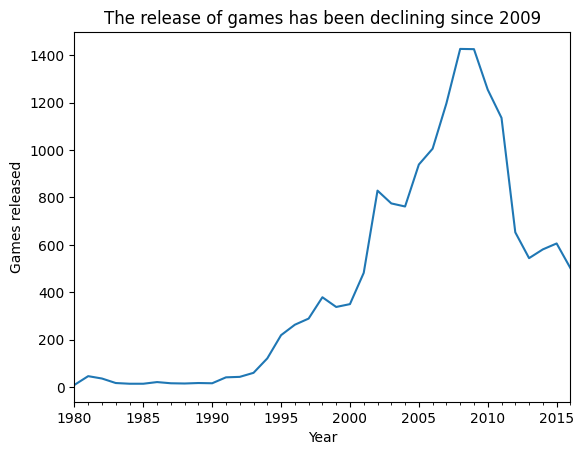

In [27]:
# Agrupamos los datos por año, contamos los lanzamientos y graficamos
games_per_year = games.groupby('year_of_release')['name'].count().reset_index(name='games_released_per_year')
games_per_year.plot(
    kind='line',
    x='year_of_release',
    y='games_released_per_year',
    legend=False,
    title='The release of games has been declining since 2009',
    xlabel='Year',
    ylabel='Games released'
)
plt.show()



La popularidad de los videojuegos en consolas se incrementó en 1994, alcanzando su mayor pico en 2009. Después comenzó a decrecer hasta 2016.
Para hacer una buena planeación hacia 2017, es necesario tomar en cuenta esta tendencia y adaptarse a los cambios en las preferencias de los consumidores.

### 3.2 Análisis de ventas por plataforma a través del tiempo

In [28]:
# ¿Cómo varian las ventas de una plataforma a otra?
# Agrupamos las ventas totales por plataforma y ordenamos de mayor a menor
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)



platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Enfocaremos el análisis en el top 5 de las plataformas con más ventas. Estudiaremos la distribución de los datos de cada año. Buscamos entender la dinámica del mercado comparando las plataformas que solían ser populares pero ahora ya no lo son. Es decir, ¿cómo es el ciclo de las plataformas de videojuegos?

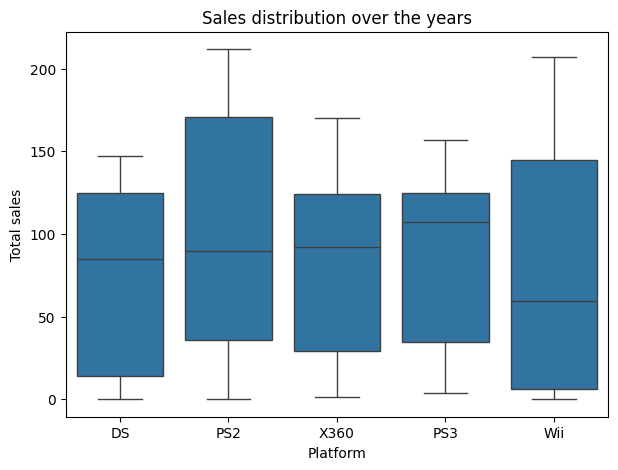

In [29]:
# Distribución de ventas de las plataformas por año
# Agrupamos por año y por plataforma, seleccionamos el total de ventas y filtramos a las 5 plataformas 
# con más ventas para construir las distribuciones con boxplots.
top_5_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
sales_per_year = games.groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
filtered_sales_per_year = sales_per_year[sales_per_year['platform'].isin(top_5_platforms.index)] 
plt.figure(figsize=(7, 5))
sns.boxplot(x='platform', y='total_sales', data=filtered_sales_per_year)
#sns.boxplot(x='month', y='charged_minutes_per_month', data=consumption)

plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.title('Sales distribution over the years')
plt.show()


Con estos diagramas de caja podemos ver las ventas en todo el periodo que tenemos disponible en el dataset. Observamos que la plataforma con más ventas, tanto en el máximo como en la concentración intercuartílica es el PS2 - Play Station 2. Vemos que el primer cuartil también se ubica ligeramente arriba de los demás y el tercer cuartil revasa por mucho a las demás plataformas, en algunas revasa incluso sus máximos de venta. En segundo y tercer lugar tenemos a las plataformas X360 - Xbox 360 y PS3 - Play Station 3, cuyos datos de venta son muy similares. En el cuarto lugar del top 5 tenemos a Nintendo Wii, cuyos valores de venta están más dispersos con un rango intercuartílico más amplio que las demás plataformas, aunque alcanzó máximos de venta superiores a las plataformas del segundo y tercer lugar, sin embargo, es importante notar que la mediana se ubica por debajo de la mediana de estas dos anteriores. Por último, tenemos a Nintendo DS que también presenta un rango intercuartílico amplio pero con el primer cuartil en valores bajos y un valor máximo menor a las demás plataformas. Cabe señalar que esta plataforma es distinta a las demás, ya que se trata de una plataforma de videojuegos portátil.

A continuación elaboraremos gráficos de barras para ver las ventas por cada año y de esta manera poder identificar los periodos de venta a través de los años. Trataremos de identificar patrones en los ciclos de vida de estas plataformas.

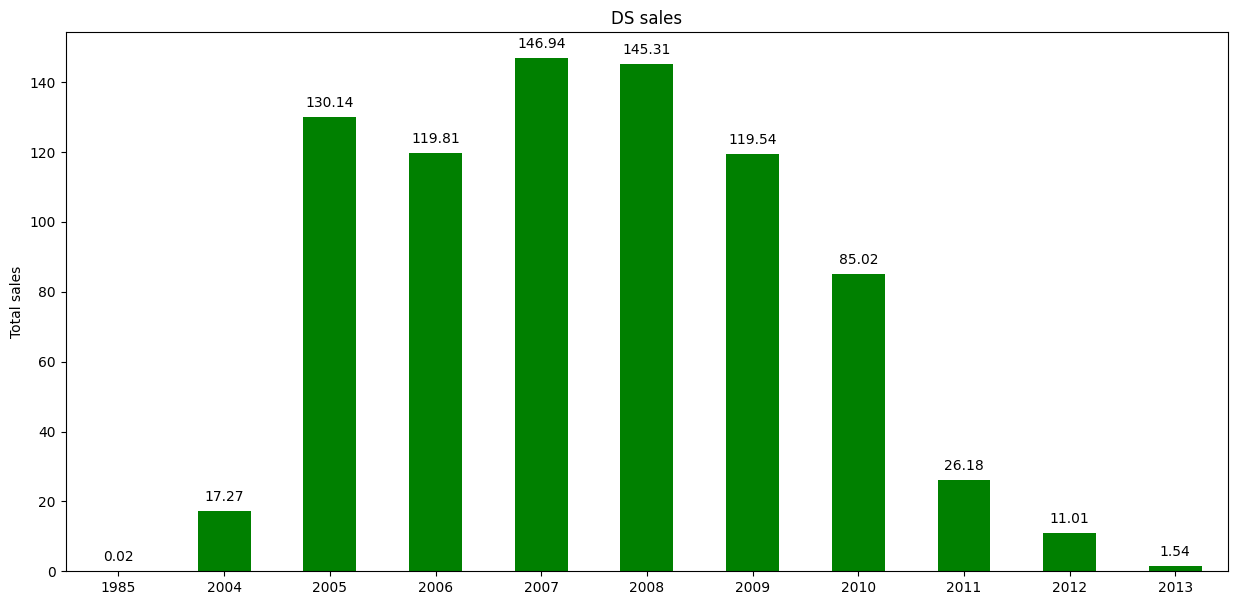

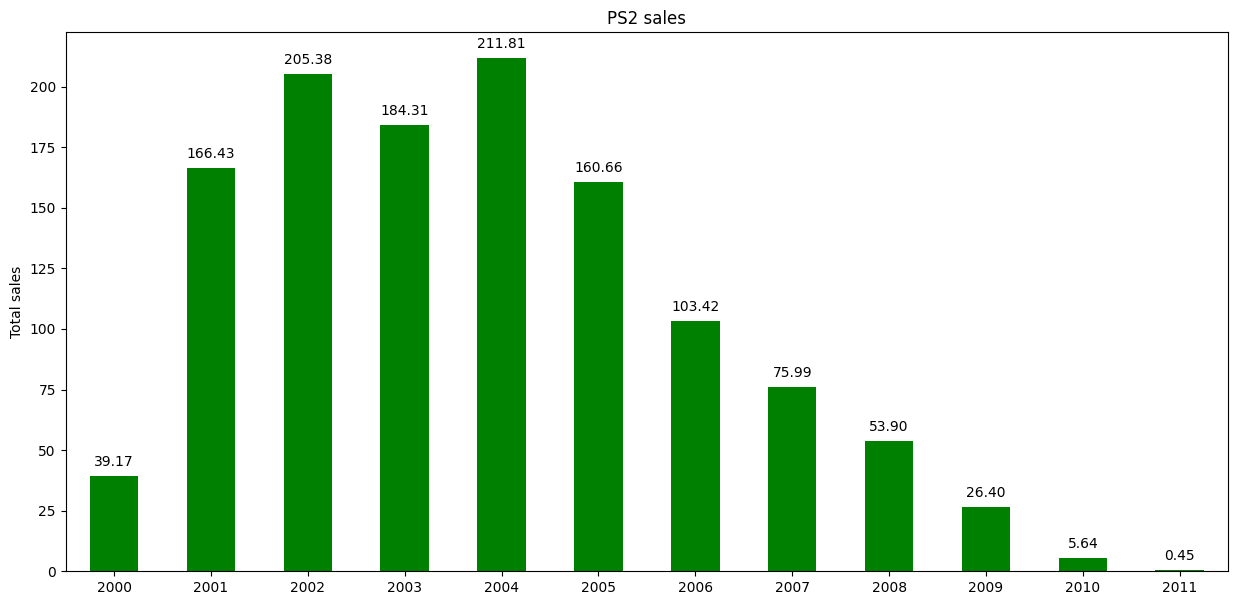

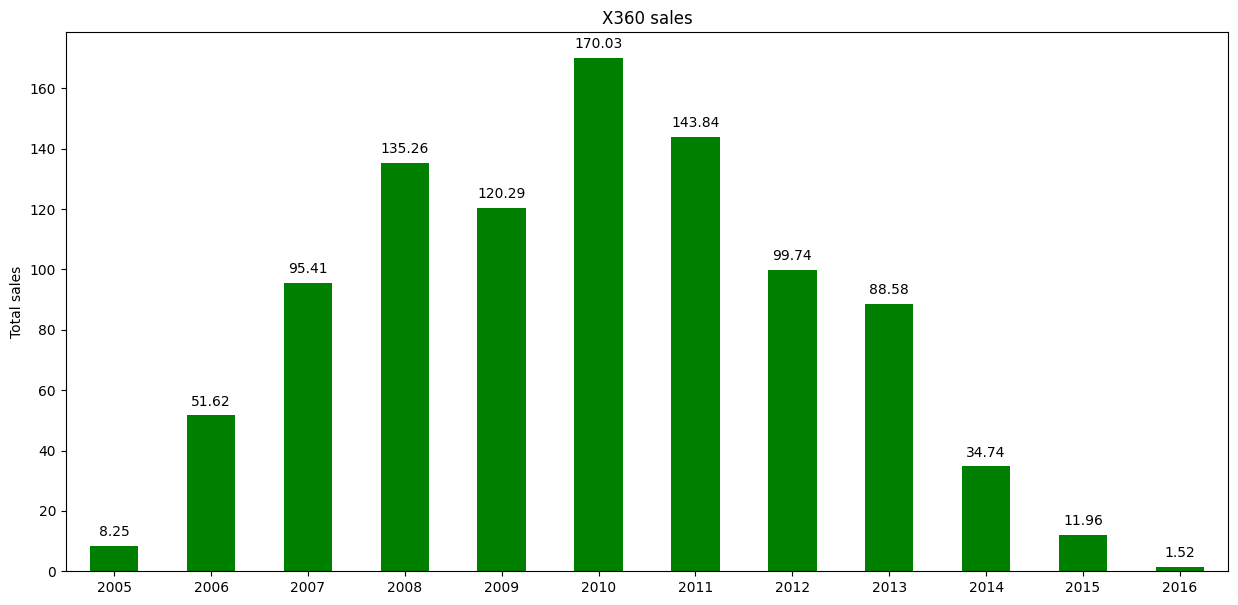

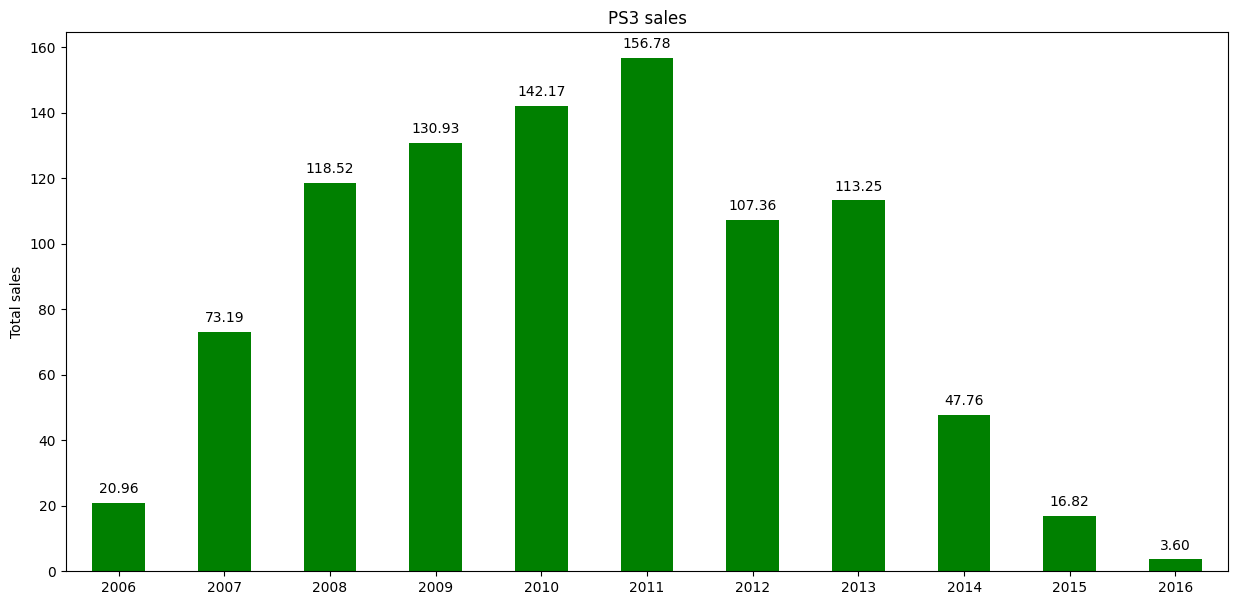

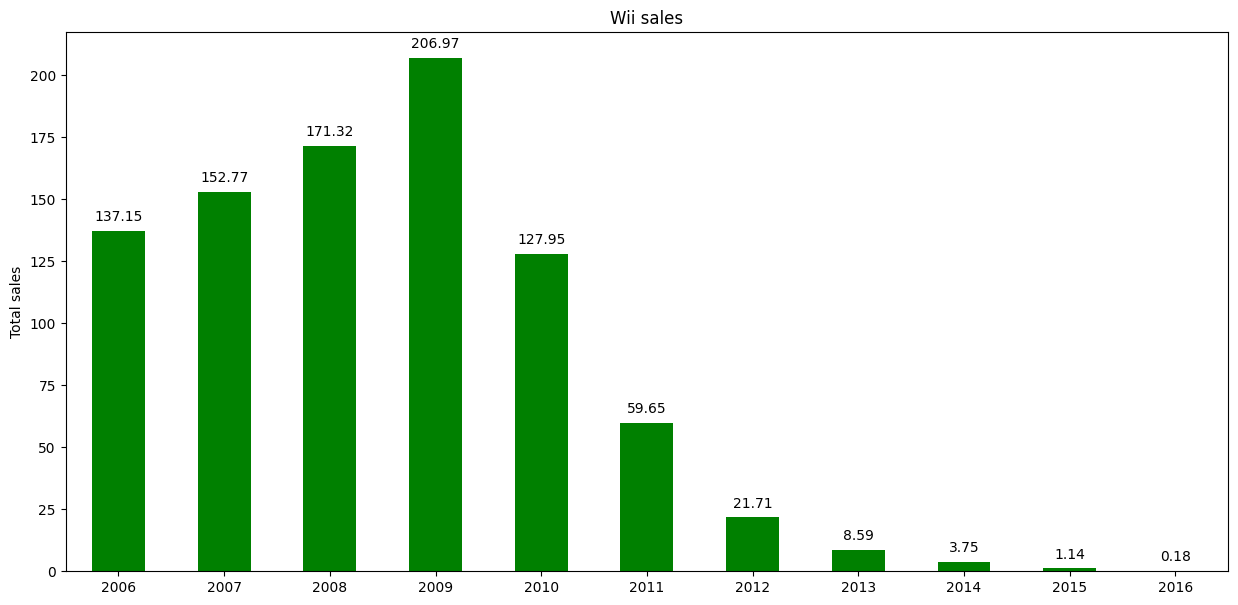

In [30]:
# Generamos las gráficas utilizando un bucle for.
for element in filtered_sales_per_year['platform'].unique():
    filtered_platform = filtered_sales_per_year.query("platform == @element")
    filtered_platform['year_of_release'] = filtered_platform['year_of_release'].dt.year
    grouped_platform = filtered_platform.groupby('year_of_release')['total_sales'].sum().reset_index()
    ax = grouped_platform.plot(
    kind='bar',
    x='year_of_release',
    y='total_sales',
    xlabel='',
    ylabel='Total sales',
    figsize=(15,7),
    legend=False,
    rot=0,
    title='{} sales'.format(element),
    color='green')
    for i in ax.containers[0]:
        ax.annotate(f'{i.get_height():.2f}', xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', va='bottom')
    plt.show()

- Podemos ver en las gráficas anteriores que por lo general, las plataformas tienen un periodo de crecimiento en ventas fuerte de entre 4 y 5 años, después empiezan a decrecer y tienden a desaparecer en 3 años más.
- En el caso de la plataforma PS2, que tuvo una popularidad excepcional y record en ventas, es notable cómo las ventas caen cuando sale al mercado la plataforma PS3.
- Tomando como base esta información, podríamos decir que las plataformas nuevas tienden en aparecer entre 5 y 6 años y tienden a desaparecer alrededor de 9 años.
- Dado que ninguna de las plataformas anteriores tiene ventas significativas en 2016, no se podría recomendar alguna campaña publicitaria basada en ellas. 
- Por lo anterior, la recomendación es buscar plataformas alternativas para enfocar los esfuerzos de marketing.


### 3.3 Acotamos el periodo de tiempo para realizar un análisis con datos más significativos

- Con el ciclo de vida observado, buscaremos las plataformas con ventas significativas y sostenidas de los últimos 4 años, es decir, desde 2013. De esta manera podríamos ubicar las plataformas que todavía estén en su ciclo de crecimiento hacia 2017. En realidad buscaríamos las ventas fuertes a partir de 2014, pero el visualizar 2013 nos daría información adicional sobre si es el primer año de ventas de la plataforma, como se esperaría en el caso de XOne - XBox One y PS4 - Play Station 4.

### 3.4 Identificamos plataformas líderes en el mercado y su ciclo de vida

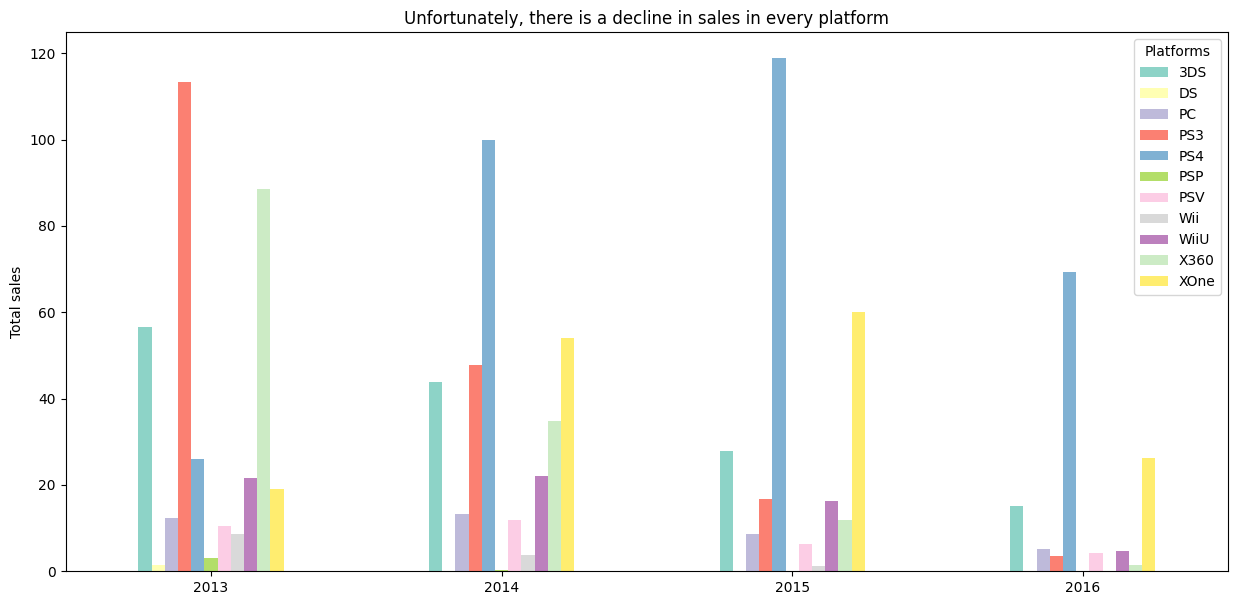

In [31]:
# Filtramos el dataset por año mayor o igual a 2014.
games_from_2013 = games.query("year_of_release >= 2013")
games_from_2013['year_of_release'] = games_from_2013['year_of_release'].dt.year
top_games_from_2013 = games_from_2013.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_games_from_2013.plot(
    kind='bar',
    xlabel='',
    ylabel='Total sales',
    figsize=(15,7),
    rot=0,
    title='Unfortunately, there is a decline in sales in every platform',
    colormap='Set3'
)
plt.legend(title='Platforms')
plt.show()



- En esta gráfica podemos ubicar las plataformas líderes en ventas: PS4, XOne y 3DS. Sin embargo, en ninguna se observa un crecimiento de 2015 a 2016.
- Es notorio que las plataformas que tienden a desaparecer son: DS, PS3, PSP, Wii y X360.
- Al observar que no hay plataformas con un crecimiento en años recientes, se vuelve conveniente ampliar la gráfica a 10 años para cubrir lo que potencialmente dura el ciclo de vida de las plataformas.

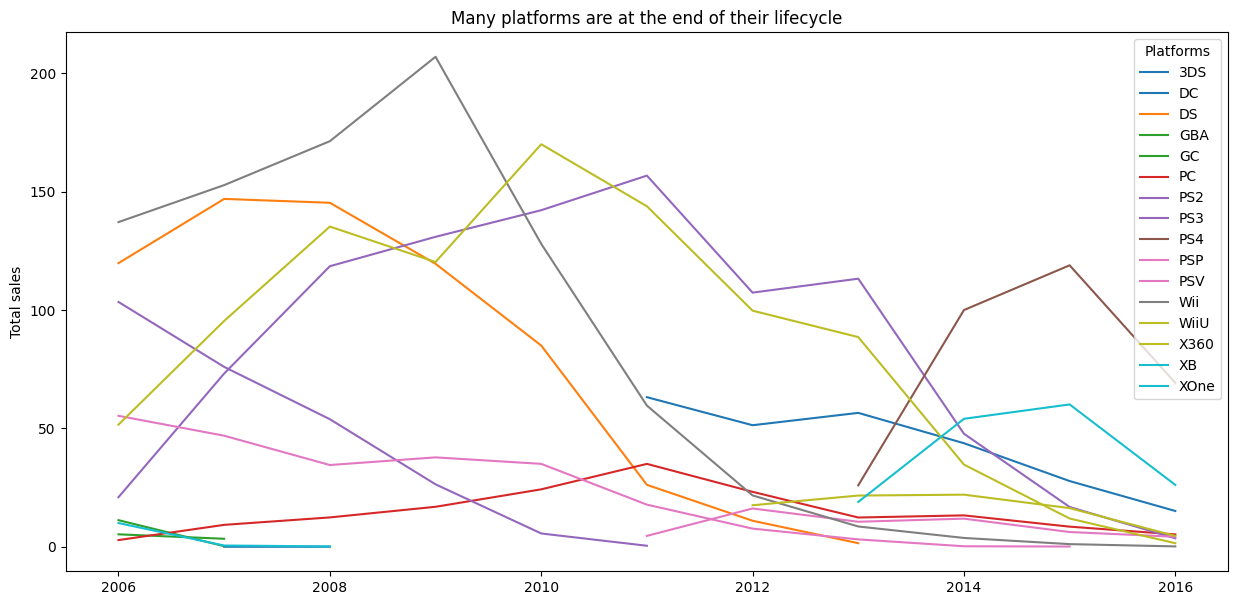

In [32]:
# Filtramos el dataset por año mayor o igual a 2007.
games_from_2006 = games.query("year_of_release >= 2006")
games_from_2006['year_of_release'] = games_from_2006['year_of_release'].dt.year
top_games_from_2006 = games_from_2006.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
top_games_from_2006.plot(
    kind='line',
    xlabel='',
    ylabel='Total sales',
    figsize=(15,7),
    rot=0,
    title='Many platforms are at the end of their lifecycle',
    colormap='tab10'
)
plt.legend(title='Platforms')
plt.show()

- Observando las dos gráficas anteriores, podemos confirmar que varias de estas plataformas se encuentran al final de su ciclo de vida.
- Algunas otras son más recientes, 2011 y 2012, en el caso de 3DS, PSV y WiiU, pero no tuvieron el mismo crecimiento que se puede observar en otras plataformas. Cabe mencionar que las antes mencionadas son plataformas portátiles, por lo que el comportamiento se debe considerar como una categoría especial.
- Cabe resaltar también que las ventas en videojuegos para PC si bien no son números tan altos, sí se mantienen a través del tiempo.
- Por lo anterior, las plataformas potencialmente rentables son PS4, XOne y PC. Las tres con ciertas reservas, ya que como hemos mencionado la tendencia de 2015 a 2016 no es muy favorable.

### 3.5 Analizamos la distribución a través de diagramas de caja y bigotes
- A continuación analizaremos la distribución de las ventas globales desglozadas por plataforma y observaremos las diferencias en las ventas y el promedio de ventas de varias plataformas.

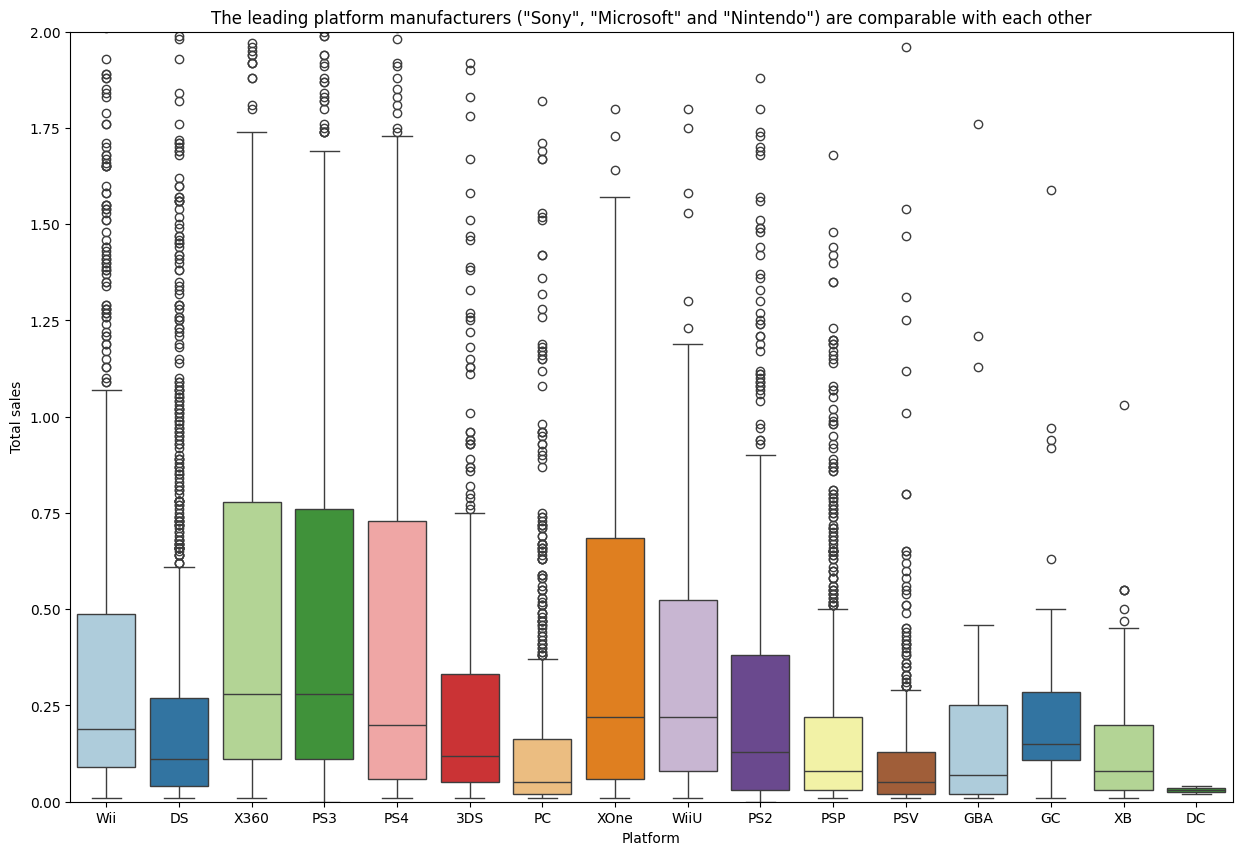

In [33]:
# Diagrama de caja para las ventas globales por plataforma
plt.figure(figsize=(15,10))
sns.boxplot(
    x='platform', 
    y='total_sales', 
    data=games_from_2006,
    palette='Paired'
    )
plt.ylim(0, 2)
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.title('The leading platform manufacturers ("Sony", "Microsoft" and "Nintendo") are comparable with each other')
plt.show()

In [34]:
# Calculamos la media, mediana, suma y volumne de ventas totales para cada plataforma del dataset anterior.
total_sales_mean = games_from_2006.pivot_table(index='platform', values='total_sales', aggfunc=['mean', 'median', 'sum','count'])
total_sales_mean.columns = ['mean', 'median', 'sum','count']
total_sales_mean.sort_values(by='mean')

,mean,median,sum,count
platform,,,,
DC,0.030000,0.03,0.06,2
PSV,0.125431,0.05,53.81,429
XB,0.163182,0.08,10.77,66
GBA,0.192889,0.07,8.68,45
PC,0.210593,0.05,163.42,776
PSP,0.220342,0.08,238.63,1083
GC,0.262045,0.15,11.53,44
PS2,0.330186,0.13,265.80,805
DS,0.331152,0.11,655.35,1979


- En los diagramas de caja anteriores podemos comparar las plataformas con un rango intercuartílico similar, como son la X360, PS3, PS4 y XOne. De estas, podemos ver que la plataforma PS4 es más rentable ya que con una mediana menor que las otras y un volúmen de ventas menor que las otras, alcanza una media de ventas superior.
- De la misma manera, podemos observar que la plataforma portátil más rentable sería la WiiU, ya que tienen una media de ventas y mediana superior a las otras plataformas móviles, incluso cuando el volúmen de ventas es menor.

### 3.6 Relación entre ventas totales y calificaciones de los críticos y los usuarios

A continuación veremos si las calificaciones de críticos y usuarios afectan directamente a las ventas. Para ello, seleccionamos la plataforma que tenga menos valores ausentes en las columnas 'critic_score' y 'user_score'

In [35]:
# Revisamos valores ausentes en la tabla agrupando por plataforma
missing_critic_score = games.groupby('platform')['critic_score'].value_counts(dropna=False).reset_index()
for platform in platform_info['platform'].unique():
    print('Valores ausentes en "critic_score" para ', platform, missing_critic_score[missing_critic_score['platform']==platform]['critic_score'].isna().sum())
    print('Total de valores en "critic_score" para ', platform, missing_critic_score[(~missing_critic_score['critic_score'].isna()) & (missing_critic_score['platform'] == platform)]['critic_score'].count())


Valores ausentes en "critic_score" para  PS2 1
Total de valores en "critic_score" para  PS2 70
Valores ausentes en "critic_score" para  DS 1
Total de valores en "critic_score" para  DS 69
Valores ausentes en "critic_score" para  PS3 1
Total de valores en "critic_score" para  PS3 70
Valores ausentes en "critic_score" para  Wii 1
Total de valores en "critic_score" para  Wii 72
Valores ausentes en "critic_score" para  X360 1
Total de valores en "critic_score" para  X360 74
Valores ausentes en "critic_score" para  PSP 1
Total de valores en "critic_score" para  PSP 55
Valores ausentes en "critic_score" para  PS 1
Total de valores en "critic_score" para  PS 59
Valores ausentes en "critic_score" para  PC 1
Total de valores en "critic_score" para  PC 58
Valores ausentes en "critic_score" para  XB 1
Total de valores en "critic_score" para  XB 72
Valores ausentes en "critic_score" para  GBA 1
Total de valores en "critic_score" para  GBA 65
Valores ausentes en "critic_score" para  GC 1
Total de v

In [36]:
# Escogemos la plataforma X360 por se la que tiene más valores en 'critic_score' y menos ausentes.
filtered_X360 = games.query("platform == 'X360'")
print("Coeficiente de correlación entre 'critic_score' y 'total_sales':", filtered_X360['critic_score'].corr(filtered_X360['total_sales']))

Coeficiente de correlación entre 'critic_score' y 'total_sales': 0.3937358653072587


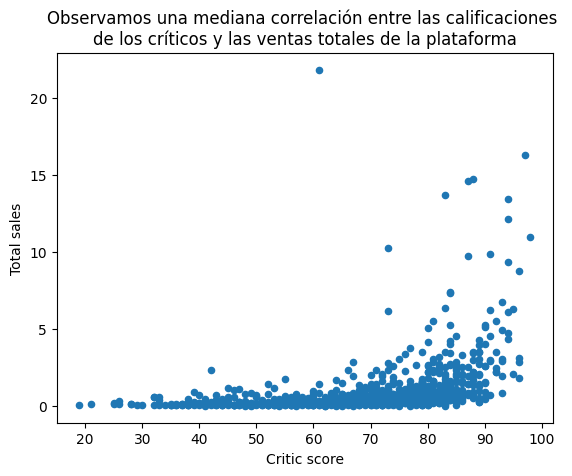

In [37]:
# Graficamos la dispersión de estas mismas variables
filtered_X360.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    xlabel='Critic score',
    ylabel='Total sales',
    title='Observamos una mediana correlación entre las calificaciones \nde los críticos y las ventas totales de la plataforma'
)
plt.show()

In [38]:
# Repetimos ahora para la columna 'fixed_user_score' donde cambiamos la leyenda "tbd" por valores ausentes
print("Coeficiente de correlación entre 'fixed_user_score' y 'total_sales':", filtered_X360['fixed_user_score'].corr(filtered_X360['total_sales']))

Coeficiente de correlación entre 'fixed_user_score' y 'total_sales': 0.1144588297845418


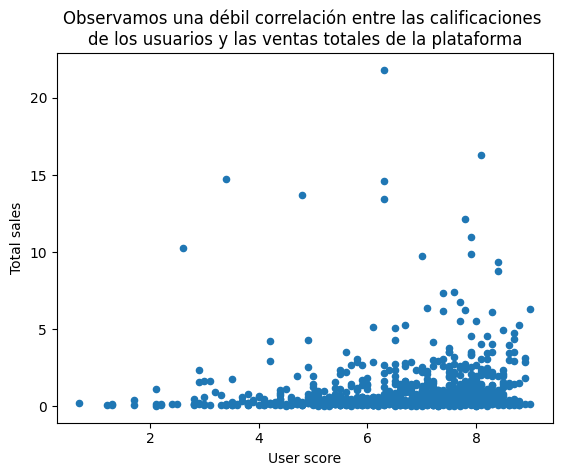

In [39]:
# Graficamos la dispersión de estas mismas variables
filtered_X360.plot(
    kind='scatter',
    x='fixed_user_score',
    y='total_sales',
    xlabel='User score',
    ylabel='Total sales',
    title='Observamos una débil correlación entre las calificaciones \nde los usuarios y las ventas totales de la plataforma'
)
plt.show()

Observando las gráficas de dispersión y los coeficientes de correlación, podemos concluir que existe una correlación mediana entre las calificaciones de los críticos y las ventas de videojuegos por plataforma. Sin embargo, en el caso de las calificaciones asignadas por los usuarios, hay una correlación débil entre estas calificaciones y las ventas totales.

Por estas razones, no se recomienda basar las decisiones de marketing en estas calificaciones, ya que no son muy influyentes en las decisiones de los consumidores.

### 3.7 Analizamos los juegos que se liberan en varias plataformas
A continuación haremos una comparación de las ventas en las distintas plataformas para los juegos que se lanzan en varias de estas.

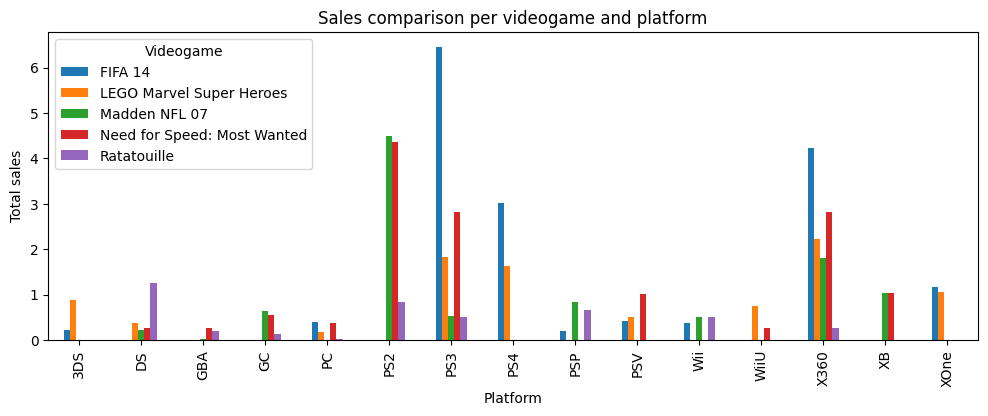

In [56]:
# Agrupamos los videojuegos por nombre e identificamos el top 5 de los que se liberaron en varias plataformas
multiplatform_games = games.groupby('name')['platform'].nunique().sort_values(ascending=False)
# Obtenemos una lista con estos nombres para filtrar el dataset games con estos juegos
multiplatform_list = list(multiplatform_games.index[0:5])
# Utilizamos esta lista para filtrar el dataset original y comparar los valores de ventas totales.
multiplatform_games_df = games[games['name'].isin(multiplatform_list)][['name','platform','total_sales']]
multiplatform_games_df.pivot_table(
    index='platform',
    columns='name',
    values='total_sales',
    aggfunc='sum').plot(
        kind='bar',
        figsize=(12,4)
    )
plt.legend(title='Videogame')
plt.title('Sales comparison per videogame and platform')
plt.xlabel('Platform')
plt.ylabel('Total sales')
plt.show()

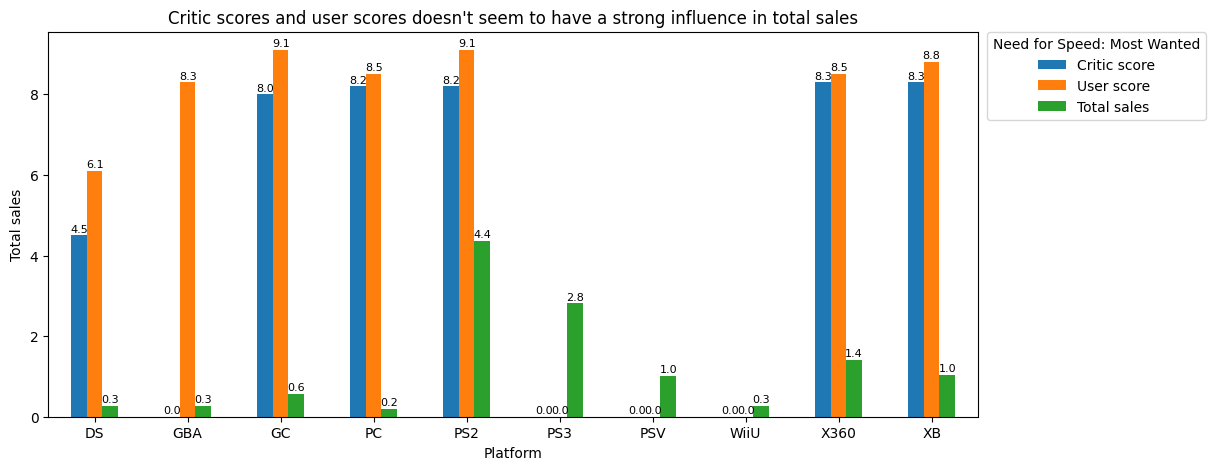

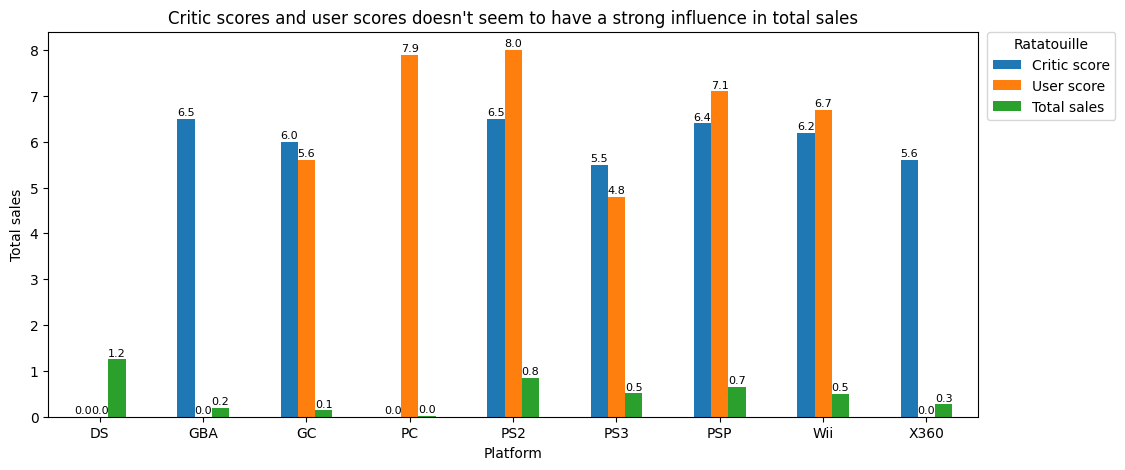

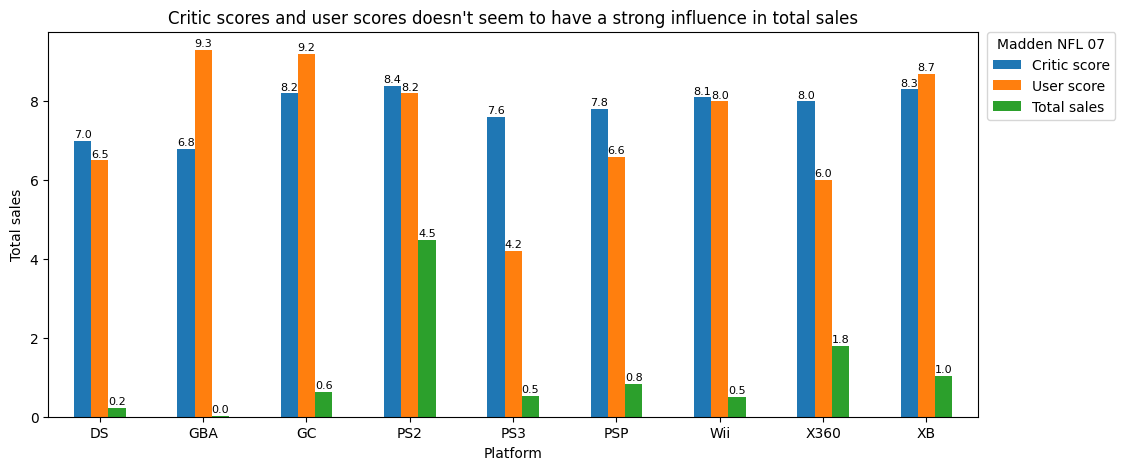

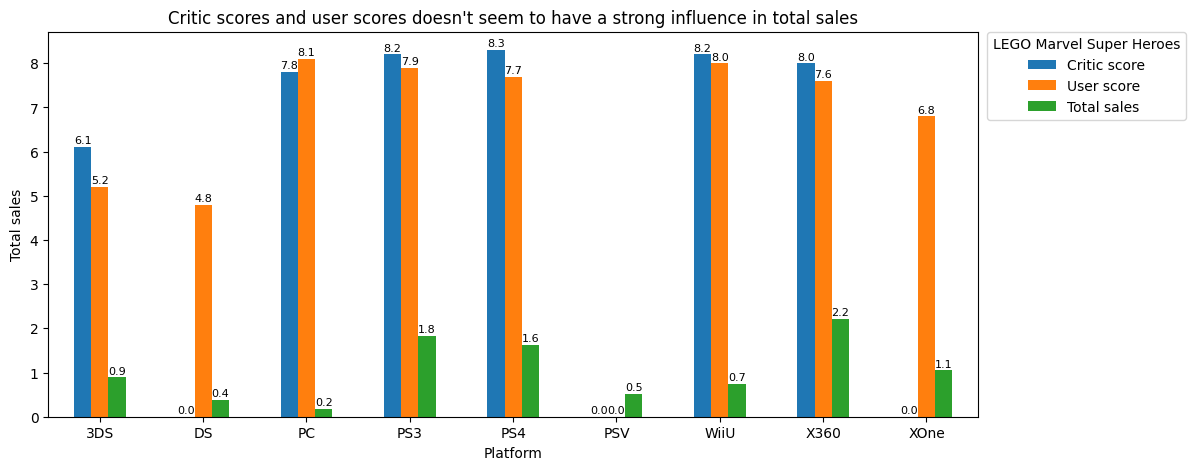

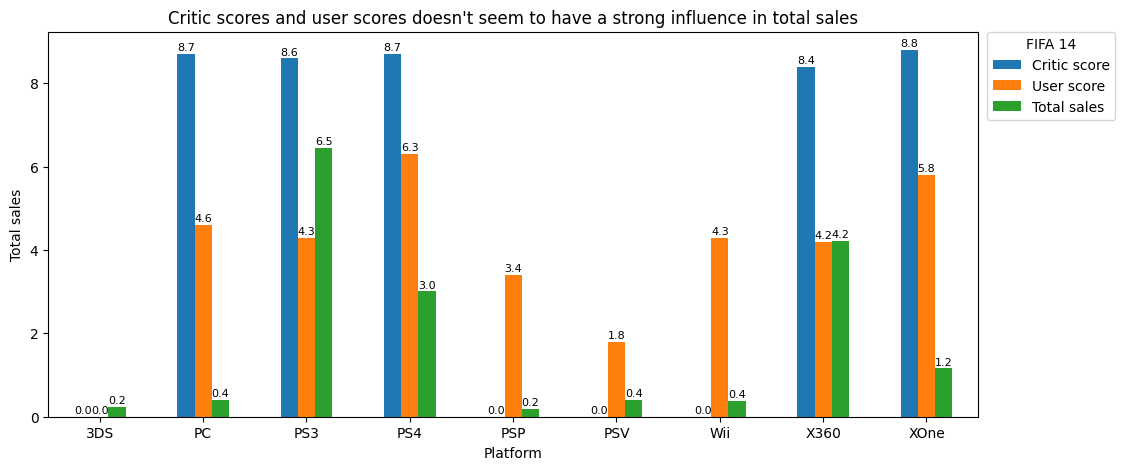

In [121]:
# Comparamos la relación entre ventas por plataforma y sus calificaciones por los críticos y usuarios para un juego en particular
# Extraemos las columnas de la tabla que nos interesan
comparison = games[['name','platform','critic_score','fixed_user_score','total_sales']]
# Cambiamos la escala en 'critic_score' para facilitar la visualización
comparison['critic_score'] = comparison['critic_score'] / 10
# Graficamos las 3 columnas para comparar mejor los valores y hacemos una gráfica por videojuego
for game in multiplatform_list:
      # Filtramos la tabla por el nombre del juego a graficar y aplicamos el método pivot_table
      ax = comparison[comparison['name']== game][['name', 'platform', 'total_sales', 'critic_score', 'fixed_user_score']].pivot_table(
            index=['platform'], 
            columns='name', 
            values=['total_sales','critic_score','fixed_user_score'], 
            aggfunc='mean').plot(kind='bar', figsize=(12,5), rot=0)     # Aplicamos el método plot() para generar la gráfica
      # Recorremos los contenedores de barras para anotar los valores de la barras en la parte superior
      for i in ax.containers[0]:
        ax.annotate(f'{i.get_height():.1f}', xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)
      for i in ax.containers[1]:
        ax.annotate(f'{i.get_height():.1f}', xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)
      for i in ax.containers[2]:
        ax.annotate(f'{i.get_height():.1f}', xy=(i.get_x() + i.get_width() / 2, i.get_height()),
                    xytext=(0, 1), textcoords='offset points',
                    ha='center', va='bottom', fontsize=8)
      # Establecemos títulos para las gráficas
      plt.legend(['Critic score','User score', 'Total sales'], title=game, bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
      plt.title('Critic scores and user scores doesn\'t seem to have a strong influence in total sales')
      plt.xlabel('Platform')
      plt.ylabel('Total sales')
      plt.show()


- Analizando la gráfica del top 5 de videojuegos que se lanzaron en varias plataformas y las gráficas posteriores. Podemos ver que no necesariamente mejores calificaciones de críticos y usuarios se traducen en mejores ventas. 
- Las ventas en la plataforma PS2 generalemente superan a otras incluso con mejores calificaciones, lo que sugiere que hay otros factores que influyen en la elección de los consumidores.

### 3.8 Analizamos la distribución de juegos por géneros

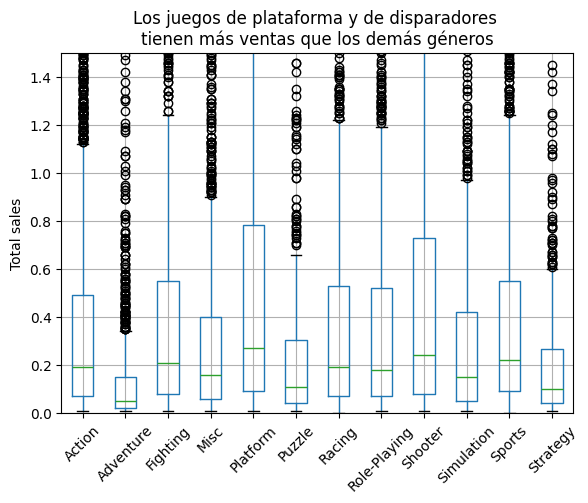

In [110]:
# Creamos un gráfico de caja y bigotes para ver las distribuciones por género
games.boxplot(
    column='total_sales',
    by='genre',
    rot=45,
)
plt.suptitle('')
plt.title('Los juegos de plataforma y de disparadores \ntienen más ventas que los demás géneros')
plt.xlabel('')
plt.ylabel('Total sales')
plt.ylim(0,1.5)
plt.show()

En esta gráfica podemos ver que los géneros de plataforma y de disparos o tiroteos, las ventas son mayores que en los otros géneros. Le siguen los géneros de pelea, deportes, acción, carreras y juegos de roles. Por su parte, podemos ver también que los juegos que requieren más tiempo para pensar como estrategia y aventura, tienen ventas significativamente más bajas que los demás géneros.